<a href="https://colab.research.google.com/github/RafaelNovais/MasterAI/blob/master/assignment2_mas_23113607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

class FrozenLake:
    def __init__(self):
        self.grid_size = 5
        self.start_state = (0, 0)
        self.goal_state = (4, 4)
        self.holes = [(1, 0), (1, 3), (3, 1), (4, 2)]
        self.actions = ['up', 'down', 'left', 'right']
        self.reset()

    def reset(self):
        self.agent_pos = self.start_state
        return self.agent_pos

    def step(self, action):
        x, y = self.agent_pos
        if action == 'up':
            x = max(0, x - 1)
        elif action == 'down':
            x = min(self.grid_size - 1, x + 1)
        elif action == 'left':
            y = max(0, y - 1)
        elif action == 'right':
            y = min(self.grid_size - 1, y + 1)

        new_pos = (x, y)

        #terminal states
        if new_pos in self.holes:
            reward = -5.0
            done = True
        elif new_pos == self.goal_state:
            reward = +10.0
            done = True
        else:
            reward = -1.0
            done = False

        self.agent_pos = new_pos
        return new_pos, reward, done

    def render(self):
        grid = [['.' for _ in range(self.grid_size)] for _ in range(self.grid_size)]
        x, y = self.agent_pos
        grid[x][y] = 'A'
        for hx, hy in self.holes:
            grid[hx][hy] = 'H'
        gx, gy = self.goal_state
        grid[gx][gy] = 'G'
        for row in grid:
            print(' '.join(row))
        print()

#usage teste
if __name__ == "__main__":
    env = FrozenLake()
    env.render()
    next_state, reward, done = env.step('right')
    env.render()


A . . . .
H . . H .
. . . . .
. H . . .
. . H . G

. A . . .
H . . H .
. . . . .
. H . . .
. . H . G



In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

class QLearningAgent:
    def __init__(self, env, alpha=0.5, gamma=0.9, epsilon=0.1, epsilon_decay=None):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.initial_epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.q_table = {}
        for i in range(env.grid_size):
            for j in range(env.grid_size):
                self.q_table[(i, j)] = {a: 0.0 for a in env.actions}

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.env.actions)
        else:
            q_vals = self.q_table[state]
            return max(q_vals, key=q_vals.get)

    def learn(self, state, action, reward, next_state):
        predict = self.q_table[state][action]
        target = reward
        if next_state not in self.env.holes and next_state != self.env.goal_state:
            target += self.gamma * max(self.q_table[next_state].values())
        self.q_table[state][action] += self.alpha * (target - predict)

    def decay_epsilon(self, episode, total_episodes):
        if self.epsilon_decay:
            self.epsilon = self.initial_epsilon * (1 - episode / total_episodes)

    def train(self, episodes=10000):
        rewards = []

        for ep in range(episodes):
            state = self.env.reset()
            total_reward = 0
            done = False

            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.learn(state, action, reward, next_state)
                state = next_state
                total_reward += reward

            self.decay_epsilon(ep, episodes)
            rewards.append(total_reward)

        return rewards

    def get_max_q_table(self):
        return {s: max(a.values()) for s, a in self.q_table.items()}


(0, 0): -0.43

(0, 1): 0.63

(0, 2): 1.81

(0, 3): 2.95

(0, 4): 4.54

(1, 0): 0.00

(1, 1): 1.81

(1, 2): 3.12

(1, 3): 0.00

(1, 4): 6.20

(2, 0): 1.81

(2, 1): 3.12

(2, 2): 4.58

(2, 3): 6.20

(2, 4): 8.00

(3, 0): 0.24

(3, 1): 0.00

(3, 2): 6.20

(3, 3): 8.00

(3, 4): 10.00

(4, 0): -1.91

(4, 1): -2.50

(4, 2): 0.00

(4, 3): 10.00

(4, 4): 0.00



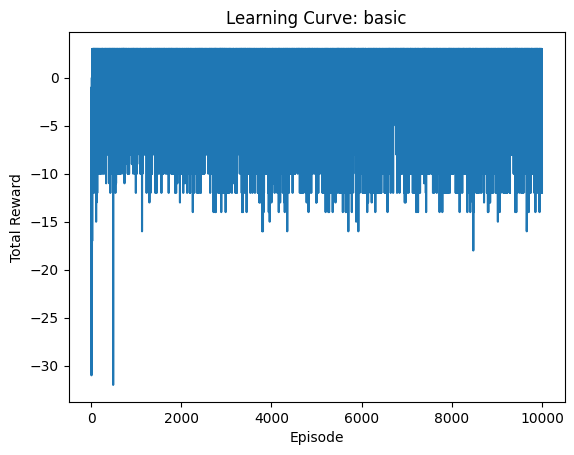

(0, 0): -0.43

(0, 1): 0.63

(0, 2): 1.81

(0, 3): -0.92

(0, 4): -0.04

(1, 0): 0.00

(1, 1): 1.81

(1, 2): 3.12

(1, 3): 0.00

(1, 4): 5.46

(2, 0): 1.81

(2, 1): 3.12

(2, 2): 4.58

(2, 3): 6.20

(2, 4): 8.00

(3, 0): -0.54

(3, 1): 0.00

(3, 2): 6.20

(3, 3): 8.00

(3, 4): 10.00

(4, 0): -2.17

(4, 1): -2.26

(4, 2): 0.00

(4, 3): 10.00

(4, 4): 0.00



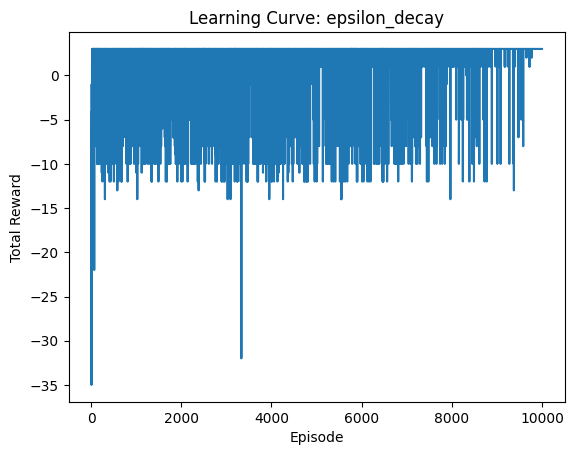

(0, 0): 0.95

(0, 1): 2.05

(0, 2): 3.21

(0, 3): 4.44

(0, 4): 5.72

(1, 0): 0.00

(1, 1): 3.21

(1, 2): 4.44

(1, 3): 0.00

(1, 4): 7.07

(2, 0): 3.21

(2, 1): 4.44

(2, 2): 5.72

(2, 3): 7.07

(2, 4): 8.50

(3, 0): 2.05

(3, 1): 0.00

(3, 2): 7.07

(3, 3): 8.50

(3, 4): 10.00

(4, 0): -2.56

(4, 1): -2.56

(4, 2): 0.00

(4, 3): 10.00

(4, 4): 0.00



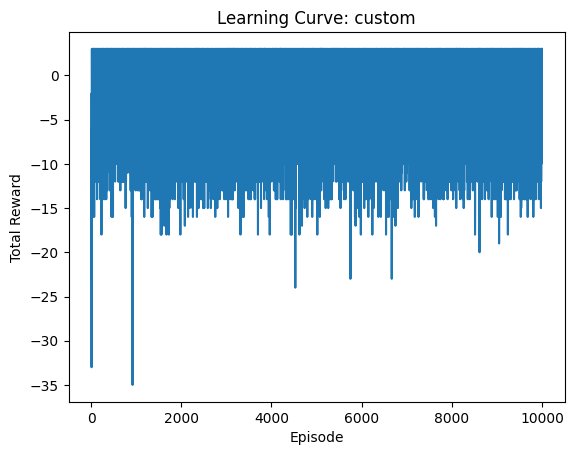

<Figure size 640x480 with 0 Axes>

In [6]:
def run_experiment(name, alpha, gamma, epsilon, epsilon_decay=False):
    env = FrozenLake()
    agent = QLearningAgent(env, alpha=alpha, gamma=gamma, epsilon=epsilon,
                           epsilon_decay=epsilon_decay)
    rewards = agent.train(episodes=10000)

    #Q-values
    with open(f"{name}_qvalues.txt", "w") as f:
        for state, q_val in agent.get_max_q_table().items():
            f.write(f"{state}: {q_val:.2f}\n") #GPT Help
            print(f"{state}: {q_val:.2f}\n")

    #learning curve
    plt.plot(rewards)
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.savefig(f"{name}_learning_curve.png") #GPT Help
    plt.show(f"{name}_learning_curve.png")
    plt.clf()

# Run all three experiments
run_experiment("basic", alpha=0.5, gamma=0.9, epsilon=0.1)
run_experiment("epsilon_decay", alpha=0.5, gamma=0.9, epsilon=0.1, epsilon_decay=True)
run_experiment("custom", alpha=0.6, gamma=0.95, epsilon=0.2)
